In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kmean import KMeans
from kmeanP import KMeansPP

In [22]:
path = "Datasets\\"

In [23]:
dataset = pd.read_csv(path + 'iris_dataset.csv')

# Extract the features and target variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

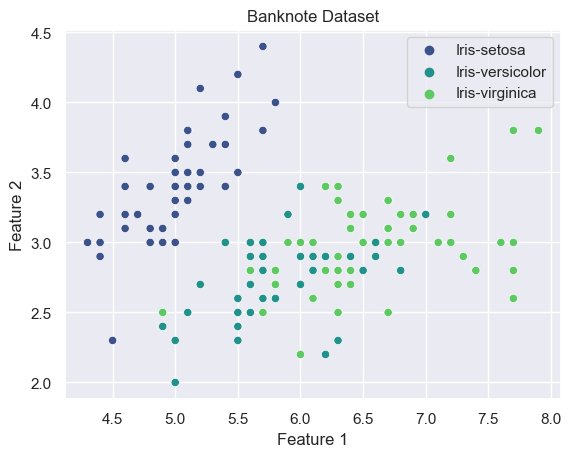

In [24]:
# Plot scatter plot
sns.set_theme()
fig, ax = plt.subplots()
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', ax=ax)

# Set labels and title
plt.title('Banknote Dataset')
ax.set(xlabel='Feature 1', ylabel='Feature 2')

# Show the plot
plt.show()

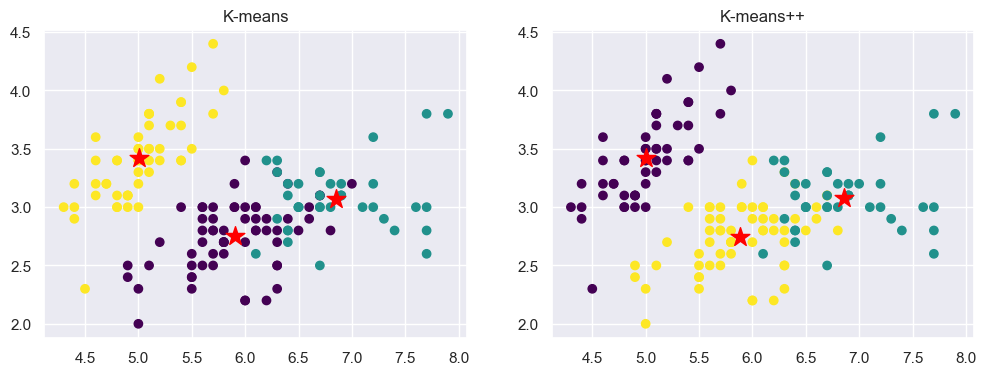

In [25]:
# Extract the features and target variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
# K-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# K-means++
kmeans_pp = KMeansPP(n_clusters=3)
kmeans_pp.fit(X)
y_kmeans_pp = kmeans_pp.predict(X)

# plot results
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(np.array(kmeans.centroids)[:, 0], np.array(kmeans.centroids)[:, 1], marker='*', s=200, c='red')
plt.title('K-means')

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_pp, cmap='viridis')
plt.scatter(np.array(kmeans_pp.centroids)[:, 0], np.array(kmeans_pp.centroids)[:, 1], marker='*', s=200, c='red')
plt.title('K-means++')

plt.show()

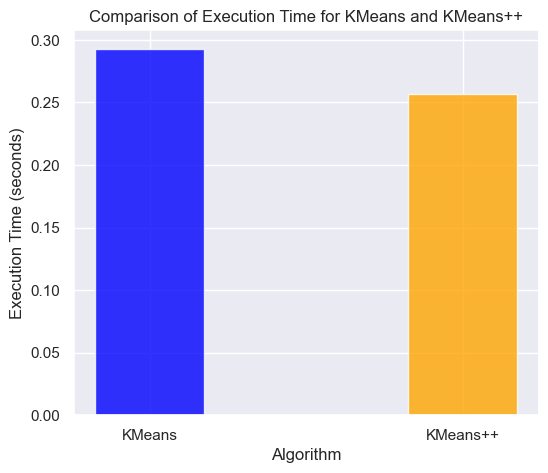

In [37]:
import time

# Initialize the timer for KMeans
start_time_kmeans = time.perf_counter()

# Calculate the execution time of KMeans
start_time = time.perf_counter()
for i in range(10):
    kmeans.fit(X)
    kmeans.predict(X)
execution_time_kmeans = time.perf_counter() - start_time

# Calculate the execution time of KMeans++
start_time = time.perf_counter()
for i in range(10):
    kmeans_pp.fit(X)
    kmeans_pp.predict(X)
execution_time_kmeans_pp = time.perf_counter() - start_time

# Visualize the clustering results
fig, ax = plt.subplots(figsize=(6, 5))

bar_width = 0.35
opacity = 0.8
colors = ['blue', 'orange']

execution_times = [execution_time_kmeans, execution_time_kmeans_pp]

ax.bar(['KMeans', 'KMeans++'], execution_times, bar_width, alpha=opacity, color=colors)

plt.xlabel('Algorithm')
plt.ylabel('Execution Time (seconds)')
plt.title('Comparison of Execution Time for KMeans and KMeans++')

plt.show()
